In [3]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [2]:
df = pd.read_csv(r"C:\Users\kezya_sxr\OneDrive\Desktop\ML LAB\emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [10]:
df = df.drop("Email No.", axis=1)


In [11]:
df.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


this is a text-classification problem. When a spam classifier looks at a mail, it searches for potential words that it has seen in the previous spam emails. If it finds a majority of those words, then it labels it as 'Spam'. Why did I say majority ? -->

CASE 1 : suppose let's take a word 'Greetings'. Say, it is present in both 'Spam' and 'Not Spam' mails.

CASE 2 : Let's consider a word 'lottery'.Say, it is present in only 'Spam' mails.

CASE 3 : Let's consider a word 'cheap'. Say, it is present only in spam.

If now we get a test email, and it contains all the three words metioned above, there's high probability that it is a 'Spam' mail.

The most effective algorithm for text-classification problems is the Naive Bayes algorithm, that works on the classic Bayes' theorem. This theorem works on every individual word in the test data to make predictions(the conditional probability with higher probability is the predicted result).

Say, our test email(S)is,"You have won a lottery"

HOW NAIVE BAYES WORKS ON THIS DATA -->

P(S) = P('You') P('have') P('won') P('a') P('lottery') __ 1

Therefore, P(S|Spam) = P('You'|Spam) P('have'|Spam) P('won'|Spam) P('a'|Spam) P('lottery'|Spam) __ 2

Same calculation for P(S|Not_Spam) __ 3

If 2 > 3, then 'Spam' Else, 'Not_Spam'.

WHAT IF THE PROBABILITY IS ZERO ? Here comes the concept of Laplace Smoothing, where P(words) = (word_count + 1)/(total_no_of_words + no_of_unique_words)

Here, we'll work on the existing Multinomial Naive Bayes classifier (under scikit-learn).

In [12]:
X = df.iloc[:,1:3001]
X

,to,ect,and,for,of,a,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,32,0,0,5,6,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,6,5,151,4,3,23,18,...,0,0,0,0,0,0,0,1,0,0
5169,0,1,1,0,0,11,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,2,1,28,2,0,8,11,...,0,0,0,0,0,0,0,1,0,1


In [13]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [15]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25)


In [17]:
from sklearn.metrics import accuracy_score
mnb = MultinomialNB(alpha=1.9)         # alpha by default is 1. alpha must always be > 0. 
# alpha is the '1' in the formula for Laplace Smoothing (P(words))
mnb.fit(train_x,train_y)
y_pred1 = mnb.predict(test_x)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,test_y))

Accuracy Score for Naive Bayes :  0.9474091260634184


C:\Users\kezya_sxr\AppData\Local\Temp\ipykernel_7316\418406833.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_count.index, y=spam_count.values, palette="viridis")


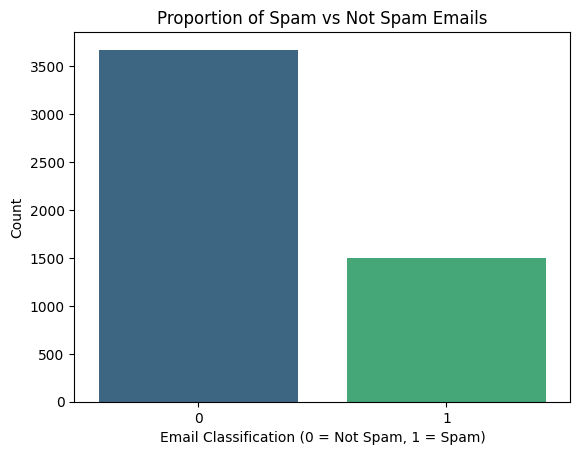

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values for Spam (1) and Not Spam (0)
spam_count = df['Prediction'].value_counts()

# Plot the bar chart
sns.barplot(x=spam_count.index, y=spam_count.values, palette="viridis")
plt.title('Proportion of Spam vs Not Spam Emails')
plt.xlabel('Email Classification (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()


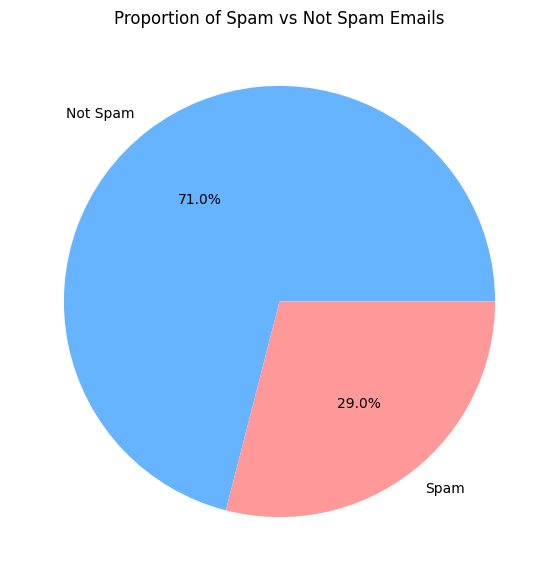

In [20]:
plt.figure(figsize=(7, 7))
plt.pie(spam_count, labels=['Not Spam', 'Spam'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title('Proportion of Spam vs Not Spam Emails')
plt.show()

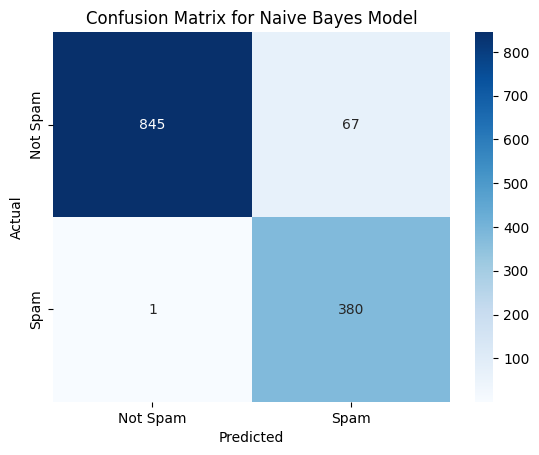

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred1)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


TN	 -    FP

FN	 -    TP

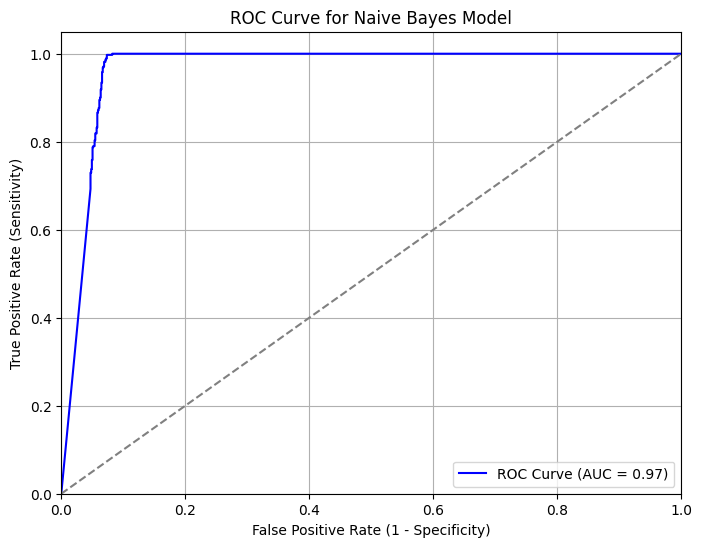

In [24]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (Spam)
y_prob = mnb.predict_proba(test_x)[:, 1]  # Get probabilities for the 'Spam' classB
fpr, tpr, thresholds = roc_curve(test_y, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**AUC:** 0.97 (high performance).

**ROC Curve:** Close to top-left (good classification).

**True Positive Rate:** High sensitivity.

**False Positive Rate:** Low errors.







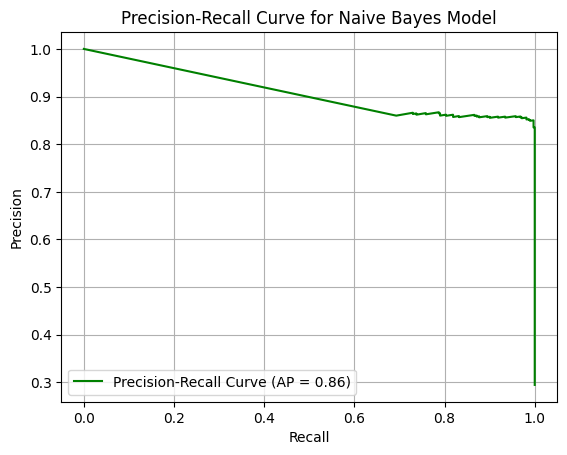

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Get the predicted probabilities for the positive class (Spam)
y_prob = mnb.predict_proba(test_x)[:, 1]  # Probabilities for the 'Spam' class

# Compute Precision-Recall curve and the average precision score
precision, recall, thresholds = precision_recall_curve(test_y, y_prob)
average_precision = average_precision_score(test_y, y_prob)

# Plotting the Precision-Recall curve
plt.plot(recall, precision, color='green', label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes Model')
plt.legend(loc='lower left')
plt.grid(True)

**AP Score:** 0.86 (good performance).

**Precision**: High at lower recall.

**Recall:** Increases as precision drops.

**Sharp decline:** Precision drops after 0.9 recall.

- **Precision:**  measures the accuracy of the positive predictions.
- **Recall (Sensitivity):**  measures the ability of the model to capture all relevant positive instances

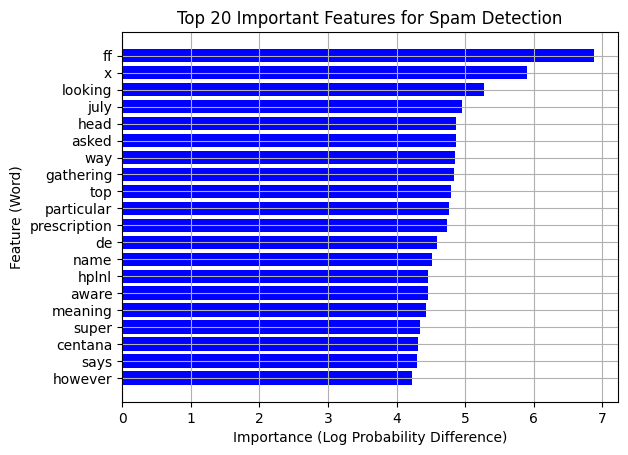

In [33]:
# extracting the log probabilities for each feature conditioned on each class
feature_log_prob_spam = mnb.feature_log_prob_[1]  # Log probabilities for spam class (1)
feature_log_prob_nonspam = mnb.feature_log_prob_[0]  # Log probabilities for non-spam class (0)

# calcularting the importance of each feature by calculating the difference in log probabilities
feature_importance = feature_log_prob_spam - feature_log_prob_nonspam

#the names of the features (columns) from the dataframe
features = df.columns[:-1]  # Exclude the 'Prediction' column

#the indices of the top N important features
N = 20
top_n_indices = np.argsort(feature_importance)[-N:]  # Sort and get top N indices

#top N features and their corresponding importance
top_n_features = features[top_n_indices]
top_n_importance = feature_importance[top_n_indices]

# plotting the top N features
plt.barh(top_n_features, top_n_importance, color='blue')
plt.xlabel('Importance (Log Probability Difference)')
plt.ylabel('Feature (Word)')
plt.title(f'Top {N} Important Features for Spam Detection')
plt.grid(True)



In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred1)

# Calculate precision, recall, F1-score
precision = precision_score(test_y, y_pred1)
recall = recall_score(test_y, y_pred1)
f1 = f1_score(test_y, y_pred1)

# Calculate AUC-ROC score
y_prob = mnb.predict_proba(test_x)[:, 1]  # Get predicted probabilities for positive class (spam)
auc_roc = roc_auc_score(test_y, y_prob)

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC-ROC': auc_roc
}

# results as a table
print(f"{'Metric':<15} | {'Score':<10}")
print('-' * 30)
for metric, score in metrics.items():
    print(f"{metric:<15} | {score:.4f}")

Metric          | Score     
------------------------------
Accuracy        | 0.9474
Precision       | 0.8501
Recall          | 0.9974
F1-Score        | 0.9179
AUC-ROC         | 0.9658


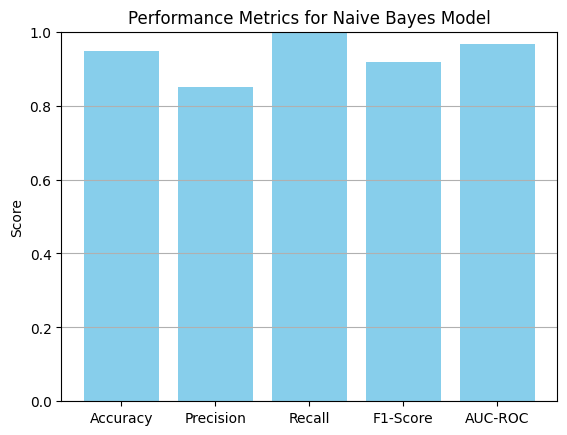

In [38]:
metric_names = list(metrics.keys())
metric_values = list(metrics.values())
plt.bar(metric_names, metric_values, color='skyblue')
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Model')
plt.ylim(0, 1)  
plt.grid(True, axis='y')

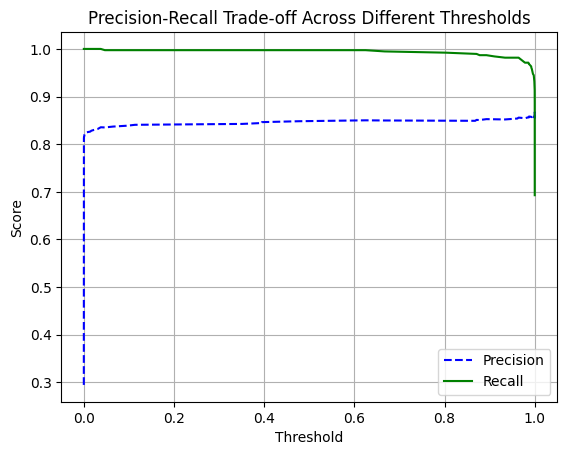

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_prob = mnb.predict_proba(test_x)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(test_y, y_prob)
plt.plot(thresholds, precisions[:-1], label="Precision", color='b', linestyle='--')
plt.plot(thresholds, recalls[:-1], label="Recall", color='g')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off Across Different Thresholds')
plt.legend(loc="best")
plt.grid(True)



The model performs well in balancing precision and recall across a wide range of thresholds, but very high thresholds cause both precision and recall to drop significantly. Optimal performance likely lies in the mid-range of thresholds.

-**Precision:** Stays around 0.8 across most thresholds.

-**Recall:** Remains high (near 1.0) until later thresholds.

-**Trade-off:** Lower thresholds increase recall but lower precision.

-**Sharp decline:** Both precision and recall drop near threshold 1.0.

-**Optimal range:** Mid-range thresholds offer the best balance.